**Question 4 -**

Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

**Link -** https://data.nasa.gov/resource/y77d-th95.json

**Note -** Write code comments wherever needed for code understanding.

**Sample Data -**

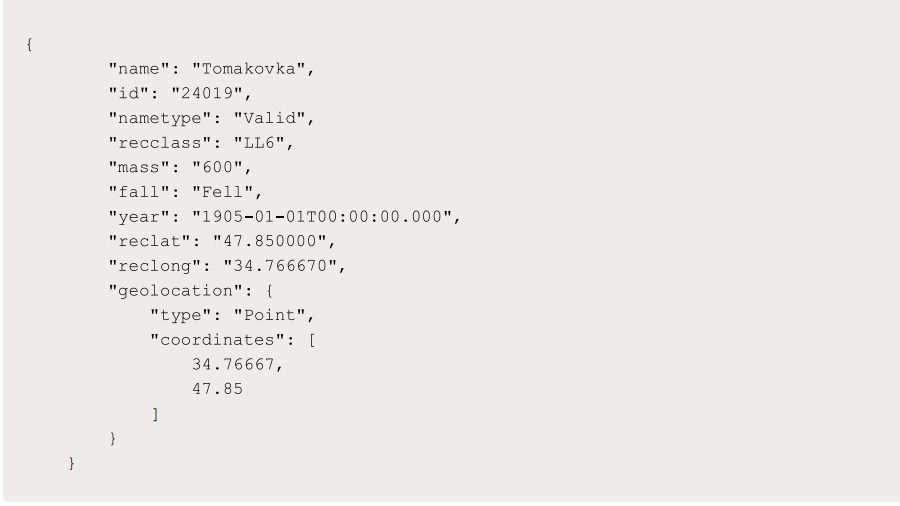

**Excepted Output Data Attributes**

● Name of Earth Meteorite - string id - ID of Earth

● Meteorite - int nametype - string recclass - string

● mass - Mass of Earth Meteorite - float year - Year at which Earth

● Meteorite was hit - datetime format reclat - float recclong - float

● point coordinates - list of int

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
url = "https://data.nasa.gov/resource/y77d-th95.json"

data = pd.read_json(url)

data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [3]:
data.shape

(1000, 12)

In [4]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                          12
reclong                         12
geolocation                     12
:@computed_region_cbhk_fwbd    867
:@computed_region_nnqa_25f4    866
dtype: int64

In [5]:
drop_col = [':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4','fall']
data.drop(drop_col, axis=1,inplace=True)

In [6]:
data = data.dropna(axis=0)

In [7]:
data.shape

(959, 9)

In [8]:
data['year'] = data['year'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f').date() if isinstance(x, str) and x != 'None' else np.nan)

data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [9]:
data = data.dropna(axis=0)

In [10]:
data['recclass'] = data['recclass'].str.replace('?', '')

C:\Users\Guddu_2\AppData\Local\Temp\ipykernel_2064\520278258.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['recclass'] = data['recclass'].str.replace('?', '')


In [11]:
data['coordinates'] = None

for index, row in data.iterrows():
    geolocation = row['geolocation']
    if geolocation is not None and 'coordinates' in geolocation:
        coordinates = geolocation['coordinates']
        data.at[index, 'coordinates'] = coordinates

In [12]:
data = data.drop('geolocation', axis=1)

In [13]:
data.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         948 non-null    object        
 1   id           948 non-null    int64         
 2   nametype     948 non-null    object        
 3   recclass     948 non-null    object        
 4   mass         948 non-null    float64       
 5   year         948 non-null    datetime64[ns]
 6   reclat       948 non-null    float64       
 7   reclong      948 non-null    float64       
 8   coordinates  948 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 106.4+ KB


In [15]:
data.shape

(948, 9)

In [16]:
data.to_csv("Meteorite.csv", index= False)